# Derivation of the cauchy BC

**WARNING:** Looks like this is a derivation of the Robin boundary condition

We would like to derive the cauchy BC, which for a field $f$ reads

$$
f(0) = a\\
\partial_z f\big|_0 = b
$$

By using the method of undetermined coefficients. We will use 

$$
f_g^I = f_g^I(f_{BC}, f_{BC}', f_1, f_2, f_3)
$$

where $f_g^I$ is the function at the ghost point extrapolated from the other points. 
We will use the notation $f_g=f(x_g)=f_{-1}$ for the ghost point, and $f_{BC}$ for the function at the boundary.
Further, we will us $x_{BC} = x_{g} + \frac{h}{2}$.
Here, the prime $f'$ will denote the derivative with respect to the dependent variable.

**WARNING**: Only finds first order convergence with this scheme

## Initialization

In [1]:
from IPython.display import display
from sympy import init_printing, latex
from sympy import symbols, sympify, solve
from sympy import Function, Eq

init_printing()

In [2]:
def replaceDerivativesAndFg(eq, terms):
    """Replaces the derivatives and f(x_BC) with something easier to work with"""
    eq = eq.replace('f(x_BC)', 'f_BC')
    for n in range(terms):
        eq = eq.replace('Subs(Derivative(f(_xi_1),' + ' _xi_1,'*n + ' _xi_1' + '), (_xi_1,), (x_BC,))', 'f_x' + 'x'*n)
    sympify(eq)
    return eq

In [3]:
x, xBC = symbols('x, x_BC')
a, b = symbols('a, b')
h = symbols('h', positive=True)

f = Function('f')
fm1, fBC, f1, f2, f3 = symbols('f_-1, f_BC, f_1, f_2, f_3')
cm1, c1, c2, c3 = symbols('cm1, c_1, c_2, c_3')


terms = 5

Taylor expasion of $f$ expanded around $a=x_{BC}-\frac{h}{2}$ evaluated in $x=x_{BC}$

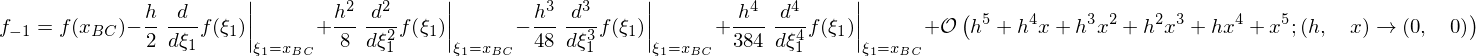

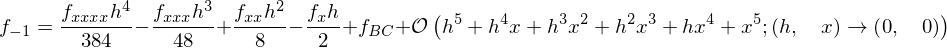

In [4]:
f_m1 = f(x-(h/2)).series(x-(h/2), x0=xBC, n=terms)
f_m1 = f_m1.subs(x-xBC,0)
f_m1 = Eq(fm1,f_m1)
display(f_m1)
f_m1 = replaceDerivativesAndFg(f_m1, terms)
display(f_m1)

Taylor expasion of $f$ expanded around $a=x_{BC}+\frac{h}{2}$ evaluated in $x=x_{BC}$

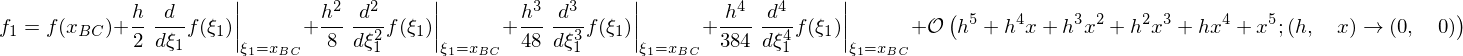

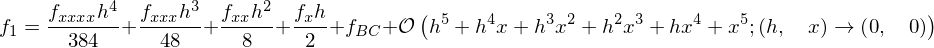

In [5]:
f_1 = f(x+(h/2)).series(x+(h/2), x0=xBC, n=terms)
f_1 = f_1.subs(x-xBC,0)
f_1 = Eq(f1,f_1)
display(f_1)
f_1 = replaceDerivativesAndFg(f_1, terms)
display(f_1)

Taylor expasion of $f$ expanded around $a=x_{BC}+\frac{3h}{2}$ evaluated in $x=x_{BC}$

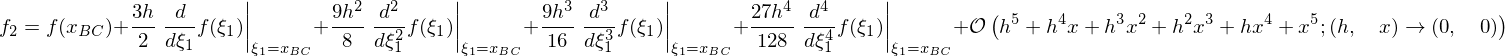

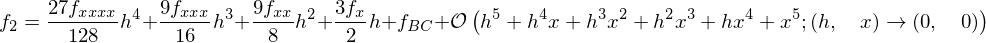

In [6]:
f_2 = f(x+(3*h/2)).series(x+(3*h/2), x0=xBC, n=terms)
f_2 = f_2.subs(x-xBC,0)
f_2 = Eq(f2,f_2)
display(f_2)
f_2 = replaceDerivativesAndFg(f_2, terms)
display(f_2)

Taylor expasion of $f$ expanded around $a=x_{BC}+\frac{5h}{2}$ evaluated in $x=x_{BC}$

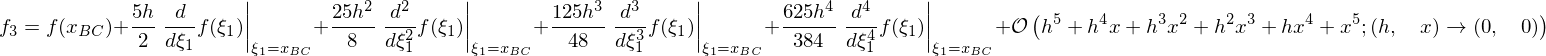

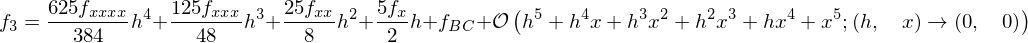

In [7]:
f_3 = f(x+(5*h/2)).series(x+(5*h/2), x0=xBC, n=terms)
f_3 = f_3.subs(x-xBC,0)
f_3 = Eq(f3,f_3)
display(f_3)
f_3 = replaceDerivativesAndFg(f_3, terms)
display(f_3)

# Make a linear combination of $f_{-1}$, $f_1$, $f_2$, $f_3$ and $f_4$ 

The linear combination will be made from the discretizations above. 
We will rearrange the linear combination, and collect terms of $f_{BC}$, $f_x$, $f_xx$ etc.
The goal is to have a Cauchy boundary condition on the form

$$f_{BC} + f_x = c_{-1}f_{-1} + c_1f_1 + c_2f_2 + c_3f_3 + \mathcal{O}(h^4)$$

We start by making the linear combination

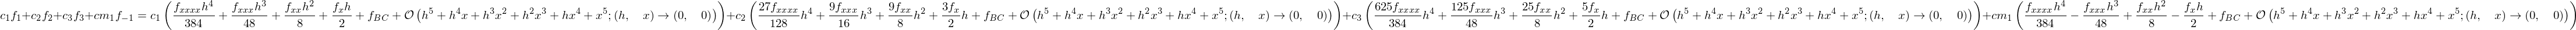

In [8]:
linComb = Eq(cm1*f_m1.lhs + c1*f_1.lhs + c2*f_2.lhs + c3*f_3.lhs, cm1*f_m1.rhs + c1*f_1.rhs + c2*f_2.rhs + c3*f_3.rhs)
display(linComb)

**NOTE**: The linear combination does *NOT* give the same as the [Robin boundary condition](https://en.wikipedia.org/wiki/Robin_boundary_condition), which fixes a linear combination of the field and its derivative to a number. 

We will now rearrange the equation above, and collect terms of $f_{BC}$, $f_x$, $f_xx$ etc.
In the end, the Cauchy boundary can be be written on the form

$$f_{BC} + f_x = c_{-1}f_{-1} + c_1f_1 + c_2f_2 + c_3f_3$$

I.e. all other terms appearing in the rearraged equation must be equated to zero.

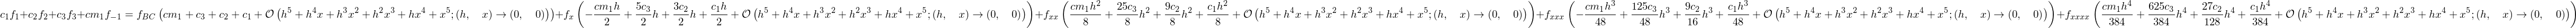

In [9]:
linComb = Eq(cm1*f_m1.lhs + c1*f_1.lhs + c2*f_2.lhs + c3*f_3.lhs,\
             linComb.rhs.expand().collect(symbols('f_BC, f_x, f_xx, f_xxx, f_xxxx, f_xxxxx'), exact=True))
display(linComb)

This gives the following set of equations:

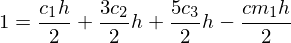

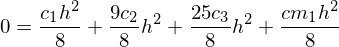

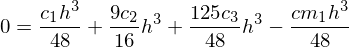

In [10]:
eq1 = Eq(1, sympify('cm1 + c_3 + c_2 + c_1'))
eq2 = Eq(1, sympify('-cm1*h/2 + 5*c_3*h/2 + 3*c_2*h/2 + c_1*h/2'))
eq3 = Eq(0, sympify('cm1*h**2/8 + 25*c_3*h**2/8 + 9*c_2*h**2/8 + c_1*h**2/8'))
eq4 = Eq(0, sympify('-cm1*h**3/48 + 125*c_3*h**3/48 + 9*c_2*h**3/16 + c_1*h**3/48'))
display(eq1)
display(eq2)
display(eq3)
display(eq4)

Note that this is 4th order accurate as we are not setting the terms of $f_{xxxx}$ to $0$, and because this will be the first term having a $h$ dependecy.

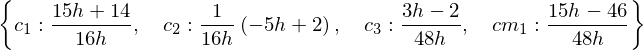

In [11]:
sol = solve([eq1, eq2, eq3, eq4], [cm1, c1, c2, c3])
display(sol)

This gives us (writing $a=f(x_{BC})$ and $b=f'(x_{BC})$

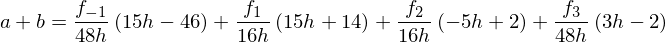

In [12]:
eq = Eq(a+b, sol[cm1]*f_m1.lhs + sol[c1]*f_1.lhs + sol[c2]*f_2.lhs + sol[c3]*f_3.lhs)
display(eq)

Solve for the ghost point $f_{-1}$

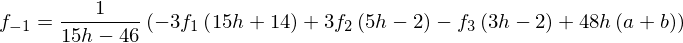

In [13]:
fm1eq = solve(eq, f_m1.lhs)
fm1eq = fm1eq[0].collect(symbols('f_1, f_2, f_3, h'), exact=True).simplify()
fm1eq = Eq(f_m1.lhs, fm1eq)
display(fm1eq)

Make the above copy pastable in order to plug it into the code

In [14]:
print(fm1eq)

Eq(f_-1, (-3*f_1*(15*h + 14) + 3*f_2*(5*h - 2) - f_3*(3*h - 2) + 48*h*(a + b))/(15*h - 46))


In [15]:
print(latex(fm1eq))

f_{-1} = \frac{1}{15 h - 46} \left(- 3 f_{1} \left(15 h + 14\right) + 3 f_{2} \left(5 h - 2\right) - f_{3} \left(3 h - 2\right) + 48 h \left(a + b\right)\right)
